We are going to use h(x) = X*theta approach in this notebook

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/ex1data2.txt', names = ['X1', 'X2', 'Y'])

In [4]:
df

,X1,X2,Y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [68]:
X = np.array(df[['X1', 'X2']])
Y = np.array(df['Y'])

In [69]:
print("Shape of features is {}".format(X.shape))

Shape of features is (47, 2)


In [18]:
def featureNormalize(X):
    n = X.shape[1] # number of features
    m = X.shape[0] # number of examples
    mu = np.zeros((1, n))
    X_norm = np.zeros(X.shape)
    sigma = np.zeros((1,n))
    for i in range(n):
        mu[0][i] = np.sum(X[:,i])/m   # zero row 1 column
        sigma[0][i] = np.sqrt((np.sum(np.square(np.subtract(X[:,i], mu[0][i]))))/(m-1))  # m-1 to match ddof = 1
        X_norm[:,i] = (X[:,i] - mu[0][i])/sigma[0][i]
#     mu = np.mean(X, axis =0)
#     sigma = np.std(X, axis =0, ddof =1)
#     X_norm = (X - mu)/sigma
    return (X_norm, mu, sigma)

Another way is <br>
mean = np.mean(X) (need to explore more on this) <br>
std = np.std(X)

In [ ]:
# (X[:, 1] - mu[0][1])/sigma[0][1]

A wrong implementation of normalising features is np.mean(X) it gives wrong norm as mean and std are calculated on both features combined, but we need each feature to be treated seperately

In [7]:
X_norm1 = (X - np.mean(X))/np.std(X)

In [8]:
np.mean(X)

1001.9255319148937

In [9]:
np.std(X)

1143.0528202028345

In [10]:
X_norm1

array([[ 9.64150080e-01, -8.73910212e-01],
       [ 5.23225574e-01, -8.73910212e-01],
       [ 1.22310574e+00, -8.73910212e-01],
       [ 3.62253135e-01, -8.74785062e-01],
       [ 1.74801587e+00, -8.73035361e-01],
       [ 8.60042905e-01, -8.73035361e-01],
       [ 4.65485460e-01, -8.73910212e-01],
       [ 3.71876488e-01, -8.73910212e-01],
       [ 3.30758528e-01, -8.73910212e-01],
       [ 4.30491452e-01, -8.73910212e-01],
       [ 8.20674646e-01, -8.73035361e-01],
       [ 8.73165658e-01, -8.73910212e-01],
       [ 7.76932135e-01, -8.73910212e-01],
       [ 3.04104448e+00, -8.72160511e-01],
       [ 2.32775304e-01, -8.73910212e-01],
       [ 1.13562072e+00, -8.73035361e-01],
       [ 2.78267515e-01, -8.74785062e-01],
       [ 2.04780098e-01, -8.73910212e-01],
       [ 1.40594944e+00, -8.73035361e-01],
       [ 1.77513622e+00, -8.73035361e-01],
       [ 6.69325559e-01, -8.73910212e-01],
       [ 7.75182435e-01, -8.74785062e-01],
       [ 5.26724975e-01, -8.73910212e-01],
       [ 8.

np.mean(X) = (np.sum(X[:,0]) + np.sum(X[:,1]))/94
That is it takes the sum of all elements of X and gives mean since no axis is defined

np.mean(X, axis =0) Gives mean along the column

In [11]:
mean = np.zeros((1,2))
mean = np.mean(X, axis=0)  # mean along the column of X
standard_deviation =  np.std(X, axis =0, ddof =1)  

ddof = Delta degree of freedom, it is 0 by default making it 1 matches it's result to Matlab standard deviation <br>
<a href= 'https://stackoverflow.com/questions/27600207/why-does-numpy-std-give-a-different-result-to-matlab-std'>Check Here</a>

In [12]:
mean

array([2000.68085106,    3.17021277])

In [13]:
standard_deviation

array([7.94702354e+02, 7.60981887e-01])

In [16]:
X_norm2 = (X-mean)/standard_deviation

In [17]:
X_norm2

array([[ 1.30009869e-01, -2.23675187e-01],
       [-5.04189838e-01, -2.23675187e-01],
       [ 5.02476364e-01, -2.23675187e-01],
       [-7.35723065e-01, -1.53776691e+00],
       [ 1.25747602e+00,  1.09041654e+00],
       [-1.97317285e-02,  1.09041654e+00],
       [-5.87239800e-01, -2.23675187e-01],
       [-7.21881404e-01, -2.23675187e-01],
       [-7.81023044e-01, -2.23675187e-01],
       [-6.37573110e-01, -2.23675187e-01],
       [-7.63567023e-02,  1.09041654e+00],
       [-8.56737193e-04, -2.23675187e-01],
       [-1.39273340e-01, -2.23675187e-01],
       [ 3.11729182e+00,  2.40450826e+00],
       [-9.21956312e-01, -2.23675187e-01],
       [ 3.76643089e-01,  1.09041654e+00],
       [-8.56523009e-01, -1.53776691e+00],
       [-9.62222960e-01, -2.23675187e-01],
       [ 7.65467909e-01,  1.09041654e+00],
       [ 1.29648433e+00,  1.09041654e+00],
       [-2.94048269e-01, -2.23675187e-01],
       [-1.41790005e-01, -1.53776691e+00],
       [-4.99156507e-01, -2.23675187e-01],
       [-4.

In [19]:
X_norm, mu, sigma = featureNormalize(X)

X_norm will be same as X_norm2 so it can be replaced in function but not equal to X_norm1(which is incorrect)

In [24]:
X_norm


array([[ 1.30009869e-01, -2.23675187e-01],
       [-5.04189838e-01, -2.23675187e-01],
       [ 5.02476364e-01, -2.23675187e-01],
       [-7.35723065e-01, -1.53776691e+00],
       [ 1.25747602e+00,  1.09041654e+00],
       [-1.97317285e-02,  1.09041654e+00],
       [-5.87239800e-01, -2.23675187e-01],
       [-7.21881404e-01, -2.23675187e-01],
       [-7.81023044e-01, -2.23675187e-01],
       [-6.37573110e-01, -2.23675187e-01],
       [-7.63567023e-02,  1.09041654e+00],
       [-8.56737193e-04, -2.23675187e-01],
       [-1.39273340e-01, -2.23675187e-01],
       [ 3.11729182e+00,  2.40450826e+00],
       [-9.21956312e-01, -2.23675187e-01],
       [ 3.76643089e-01,  1.09041654e+00],
       [-8.56523009e-01, -1.53776691e+00],
       [-9.62222960e-01, -2.23675187e-01],
       [ 7.65467909e-01,  1.09041654e+00],
       [ 1.29648433e+00,  1.09041654e+00],
       [-2.94048269e-01, -2.23675187e-01],
       [-1.41790005e-01, -1.53776691e+00],
       [-4.99156507e-01, -2.23675187e-01],
       [-4.

In [22]:
mu

array([[2000.68085106,    3.17021277]])

In [23]:
sigma

array([[7.94702354e+02, 7.60981887e-01]])

<table>
    <tr>
        <th>mu1</th>
        <th>mu2</th>
    </tr>
    <tr>
        <td>44.82978723</td>
        <td>34.10638298</td>
    </tr>
</table>

In [70]:
X = np.hstack((np.ones((X.shape[0],1)),X_norm))

In [26]:
X

array([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
       [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
       [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
       [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
       [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
       [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
       [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
       [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
       [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
       [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
       [ 1.00000000e+00, -8.56523009e-01

In [27]:
def plot_feature_output(X):
    plt.figure()
    plt.plot(X[:,1],Y, 'o')
    plt.xlabel('X1')
    plt.ylabel('Y')
    plt.title('X1 Vs Y')
    plt.show()
    plt.figure()
    plt.plot(X[:,2],Y, 'o')
    plt.xlabel('X2')
    plt.ylabel('Y')
    plt.title('X2 Vs Y')
    plt.show()

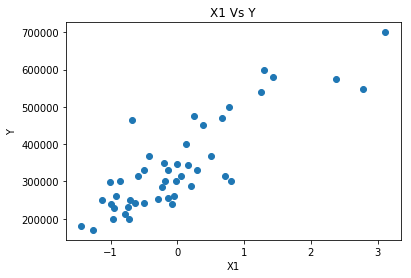

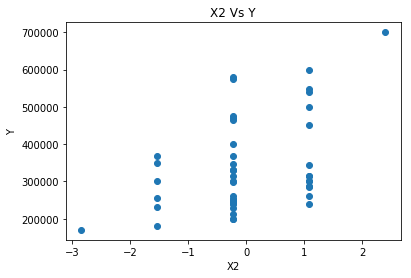

In [29]:
plot_feature_output(X)

In [30]:
def plot_feature_feature(X):
    plt.figure()
    plt.scatter(X[:,1],X[:,2])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('X1 Vs X2')
    plt.show()

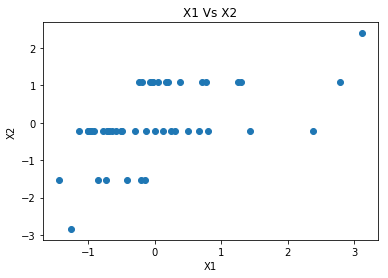

In [31]:
plot_feature_feature(X)

In [32]:
def initialise_theta(shape):
    theta = np.zeros(shape)
    return theta

In [55]:
theta = initialise_theta((X.shape[1],1))

In [34]:
theta

array([[0.],
       [0.],
       [0.]])

In [35]:
theta.shape

(3, 1)

In [36]:
Y.shape

(47,)

In [37]:
Y = Y.reshape(Y.shape[0], 1)

In [38]:
Y.shape

(47, 1)

In [41]:
def computeCost(X, Y, theta):
    m = Y.shape[0]
    cost = np.sum(np.square(np.subtract((np.dot(X, theta)), Y)))/(2*m)
    return cost

In [42]:
J = computeCost(X, Y, theta)

In [43]:
J

65591548106.45744

In [46]:
alpha = 0.01
num_of_iterations = 400

In [47]:
def gradientDescentMulti(X, Y, theta, alpha, num_of_iterations):
    m = Y.shape[0]
    cost_array = np.zeros((num_of_iterations,1))
    for i in range(num_of_iterations):
        cost = computeCost(X, Y, theta)
        cost_array[i] = cost
        theta = theta - (alpha/m)*(np.dot(X.T,(np.dot(X,theta) - Y)))
    return (theta, cost_array)

In [48]:
theta, cost_array = gradientDescentMulti(X, Y, theta, alpha, num_of_iterations)

In [49]:
theta

array([[334302.06399328],
       [100087.11600585],
       [  3673.54845093]])

In [50]:
cost_array

array([[6.55915481e+10],
       [6.43007496e+10],
       [6.30367950e+10],
       [6.17991118e+10],
       [6.05871404e+10],
       [5.94003332e+10],
       [5.82381546e+10],
       [5.71000810e+10],
       [5.59856000e+10],
       [5.48942105e+10],
       [5.38254223e+10],
       [5.27787561e+10],
       [5.17537429e+10],
       [5.07499240e+10],
       [4.97668505e+10],
       [4.88040836e+10],
       [4.78611938e+10],
       [4.69377610e+10],
       [4.60333743e+10],
       [4.51476316e+10],
       [4.42801397e+10],
       [4.34305137e+10],
       [4.25983772e+10],
       [4.17833619e+10],
       [4.09851074e+10],
       [4.02032613e+10],
       [3.94374785e+10],
       [3.86874216e+10],
       [3.79527603e+10],
       [3.72331717e+10],
       [3.65283394e+10],
       [3.58379543e+10],
       [3.51617135e+10],
       [3.44993210e+10],
       [3.38504869e+10],
       [3.32149275e+10],
       [3.25923655e+10],
       [3.19825292e+10],
       [3.13851529e+10],
       [3.07999764e+10],


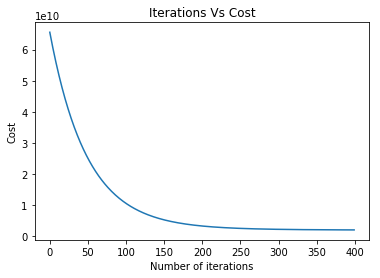

In [53]:
plt.figure()
plt.plot(cost_array)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Iterations Vs Cost')
plt.show()

In [65]:
def normalEqn(X, Y):
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)) , np.dot(X.T, Y))
    return theta

In [75]:
theta = normalEqn(X, Y)    # without Normalising and with normalising giving same results

In [76]:
theta

array([340412.65957447, 110631.05027885,  -6649.47427082])

In [77]:
J = computeCost(X, Y, theta)

In [78]:
J

2043280050.6028287

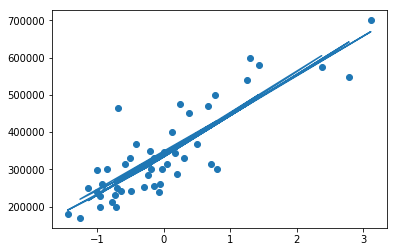

In [81]:
plt.figure()
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

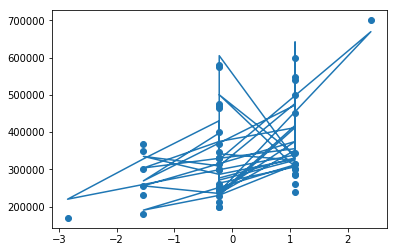

In [84]:
plt.figure()
plt.scatter(X[:,2], Y)
plt.plot(X[:,2], np.dot(X, theta))
plt.show()